In [1]:
#libraries
import requests as r
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#credentials
url='https://api.yelp.com/v3/businesses/search'
key=''
headers={'Authorization':'Bearer %s' %key}

In [3]:
#parameters, scraping sample size to check out data
parameters= {'location': '919 Milam Street, Houston TX, 77002', 'limit': 3, 'term': 'romantic', 'radius': 20000}
response=r.get(url, headers=headers, params=parameters)
data=response.json()
data

{'businesses': [{'id': 'kGbr_y_XxapZPnycxCV4Pg',
   'alias': 'ambrosia-houston',
   'name': 'Ambrosia',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/GKkd6jLP2KatTf-NTlIhpQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/ambrosia-houston?adjust_creative=LU9D9sP14nSa4NM0hR5CsA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=LU9D9sP14nSa4NM0hR5CsA',
   'review_count': 1039,
   'categories': [{'alias': 'tapasmallplates', 'title': 'Tapas/Small Plates'},
    {'alias': 'asianfusion', 'title': 'Asian Fusion'},
    {'alias': 'wine_bars', 'title': 'Wine Bars'}],
   'rating': 4.0,
   'coordinates': {'latitude': 29.731829708108556, 'longitude': -95.409729},
   'transactions': ['delivery', 'pickup', 'restaurant_reservation'],
   'price': '$$',
   'location': {'address1': '2003 Lexington St',
    'address2': '',
    'address3': '',
    'city': 'Houston',
    'zip_code': '77098',
    'country': 'US',
    'state': 'TX',
    'display_address': ['2003

In [4]:
#1000 limit and 50 steps
#multiple addresses, 500 listings this time
addresses= ['919 Milam Street, Houston TX, 77002']
offset=np.arange(0,1000,50)

#list of tuples, combination of address and offset
tuples=list(product(addresses, offset))

#viewing 5
tuples[:5]

[('919 Milam Street, Houston TX, 77002', 0),
 ('919 Milam Street, Houston TX, 77002', 50),
 ('919 Milam Street, Houston TX, 77002', 100),
 ('919 Milam Street, Houston TX, 77002', 150),
 ('919 Milam Street, Houston TX, 77002', 200)]

In [5]:
#for loop, store results into list of list, turn into DF
listings=[]
#future DF columns
cols=['Name', 'Reviews', 'Rating', 'Address', 'Phone', 'Latitude', 'Longitude','Category']

#for loop
for address, step in tuples:
    search_parameters={
        'location': address,
        'term': 'romantic', 
        'radius': 20000,
        'limit': 50, 
        'offset': step}
    resp=r.get(url, headers=headers, params=search_parameters)
    raw_data=resp.json()
    for business in raw_data['businesses']:
        name = business['name']
        reviews = business['review_count']
        rating = business['rating']
        location = business['location']['display_address'][0]
        phone = business['display_phone']
        latitude = business['coordinates']['latitude']
        longitude = business['coordinates']['longitude']
        category = business['categories'][0]['title']
        listings.append([name, reviews, rating, location, phone, latitude, longitude, category])
    df = pd.DataFrame.from_records(listings, index='Name', columns=cols)

#checking out the intial dataset
print(f'Total Records : {len(df)}')
df.head()

Total Records : 823


,Reviews,Rating,Address,Phone,Latitude,Longitude,Category
Name,,,,,,,
Ambrosia,1039,4.0,2003 Lexington St,(713) 393-7211,29.731830,-95.409729,Tapas/Small Plates
Z on 23 Rooftop,195,3.5,1121 Walker St,(346) 330-3453,29.756980,-95.362710,Cocktail Bars
Toro Toro,84,4.0,1300 Lamar St,(713) 650-1300,29.754010,-95.362770,Steakhouses
Traveler's Table,1226,4.5,520 Westheimer Rd,(832) 409-5785,29.744737,-95.388302,Tapas/Small Plates
13 Celsius,493,4.5,3000 Caroline St,(713) 529-8466,29.741280,-95.373860,Wine Bars


In [6]:
#EDA
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, Ambrosia to TGI Fridays
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Reviews    823 non-null    int64  
 1   Rating     823 non-null    float64
 2   Address    823 non-null    object 
 3   Phone      823 non-null    object 
 4   Latitude   823 non-null    float64
 5   Longitude  823 non-null    float64
 6   Category   823 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 51.4+ KB


None

,Reviews,Rating,Latitude,Longitude
count,823.000000,823.000000,823.000000,823.000000
mean,286.153098,3.800122,29.753050,-95.392233
std,355.492412,0.646787,0.061250,0.492841
min,1.000000,1.000000,28.475910,-95.545441
25%,69.500000,3.500000,29.738269,-95.450062
50%,169.000000,4.000000,29.749898,-95.403806
75%,369.000000,4.000000,29.770337,-95.375742
max,3395.000000,5.000000,29.938191,-81.368000


In [7]:
#Check out places with most reviews and highest ratings
df=df.sort_values(by='Reviews', ascending=False)
display(df.head())
df=df.sort_values(by='Rating', ascending=False)
display(df.head())

,Reviews,Rating,Address,Phone,Latitude,Longitude,Category
Name,,,,,,,
JINYA Ramen Bar - Houston,3395,4.5,3201 Louisiana St,(832) 925-8596,29.742717,-95.379758,Ramen
Dish Society,2606,4.5,5740 San Felipe St,(832) 538-1060,29.750510,-95.478690,Breakfast & Brunch
Bosscat Kitchen & Libations,2499,4.5,4310 Westheimer Rd,(281) 501-1187,29.741800,-95.450518,American (New)
"Snooze, an A.M. Eatery",2465,4.0,3217 Montrose Blvd,(713) 574-6655,29.743975,-95.390925,Breakfast & Brunch
Velvet Taco,2154,4.0,4819 Washington Ave,(832) 834-5908,29.770256,-95.410060,American (New)


,Reviews,Rating,Address,Phone,Latitude,Longitude,Category
Name,,,,,,,
Whole Foods Brewing,1,5.0,1700 Post Oak Blvd,(713) 346-0537,29.749298,-95.461920,Beer Bar
Spring Street Bar Social Garden,6,5.0,1920 Houston Ave,(832) 582-8835,29.774970,-95.371890,Wine Bars
Two Headed Dog,43,5.0,3100 Fannin St,,29.741540,-95.376284,Cocktail Bars
BATL Axe Throwing,48,5.0,1431 W 20th St,(281) 949-7776,29.803520,-95.425160,Axe Throwing
Star Sailor,25,5.0,1710 W 18th St,(832) 830-8831,29.801264,-95.430655,Beer Bar


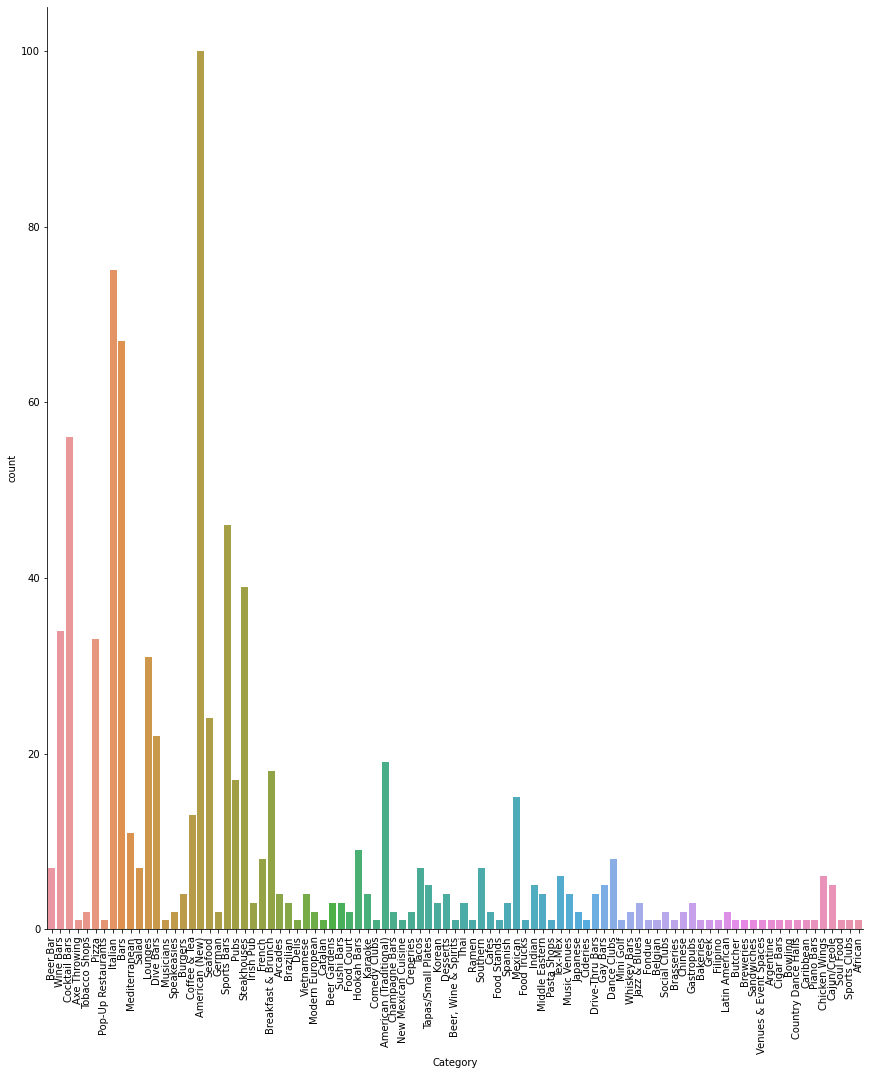

In [8]:
#visualization
g=sns.catplot(x='Category', data=df, kind='count')
plt.xticks(rotation=90)
g.fig.set_size_inches(15,15)

In [9]:
df.to_excel(r'/Users/cecylia/Desktop/Notes/Htown.xlsx')

In [10]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df.groupby(['Category']).agg(['mean', 'min', 'max', 'std', 'count']).Rating)

                            mean  min  max       std  count
Category                                                   
African                 3.000000  3.0  3.0       NaN      1
American (New)          3.915000  3.0  4.5  0.420768    100
American (Traditional)  3.184211  1.5  4.5  0.836835     19
Arcades                 3.250000  2.0  4.5  1.190238      4
Argentine               4.000000  4.0  4.0       NaN      1
Axe Throwing            5.000000  5.0  5.0       NaN      1
Bakeries                4.000000  4.0  4.0       NaN      1
Bars                    3.582090  1.0  5.0  0.800554     67
Beer Bar                4.357143  4.0  5.0  0.475595      7
Beer Gardens            4.333333  4.0  4.5  0.288675      3
Beer, Wine & Spirits    4.500000  4.5  4.5       NaN      1
Belgian                 4.000000  4.0  4.0       NaN      1
Bowling                 3.500000  3.5  3.5       NaN      1
Brasseries              4.000000  4.0  4.0       NaN      1
Brazilian               3.833333  2.5  4

/var/folders/11/7dw54ln10md9k5cbk_wjyfy80000gn/T/ipykernel_74552/1478392389.py:2: FutureWarning: ['Address', 'Phone'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(df.groupby(['Category']).agg(['mean', 'min', 'max', 'std', 'count']).Rating)
